In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
test_data.shape

(418, 11)

In [6]:
gender = pd.read_csv('gender_submission.csv')
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
gender.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [8]:
gender.shape

(418, 2)

In [9]:
df_test = pd.concat([test_data, gender], axis = 1, sort = False)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,892,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,893,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,894,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,895,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,896,1


In [10]:
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId,Survived
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1305,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1306,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1307,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1308,0
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,1309,0


In [11]:
df_test.shape

(418, 13)

In [12]:
df_test = df_test.drop('PassengerId', axis = 1)
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [13]:
df_train = train_data.drop('PassengerId', axis = 1)
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df_train.shape

(891, 11)

In [15]:
df_test.shape

(418, 11)

In [16]:
418 + 891

1309

In [17]:
frames = [df_train, df_test]
data = pd.concat(frames)

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [19]:
data.shape

(1309, 11)

In [20]:
data=data.reset_index()

In [21]:
data.shape

(1309, 12)

In [22]:
data.tail()

,index,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,413,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,417,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [23]:
data = data.drop('index', axis = 1)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [25]:
data.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

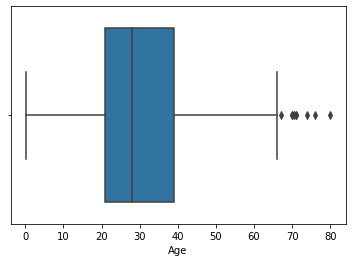

In [26]:
sns.boxplot(x = data['Age']);

In [27]:
# Using median to impute the missing values

missing_col = ['Age']
 
for i in missing_col:
    data.loc[data.loc[:,i].isnull(),i]=data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
data.isnull().sum()

count of NULL values after imputation



Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [28]:
# Using mode to impute the missing values

missing_col = ['Cabin']
 
for i in missing_col:
    data.loc[data.loc[:,i].isnull(),i]=data.loc[:,i].mode()[0]
 
print("count of NULL values after imputation\n")
data.isnull().sum()

count of NULL values after imputation



Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Cabin       0
Embarked    2
dtype: int64

In [29]:
# Dropping the rows of the Fare and Embarked variables having missing values

data.dropna(axis = 0, inplace = True)

data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [30]:
data.shape

(1306, 11)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1306 non-null   int64  
 1   Pclass    1306 non-null   int64  
 2   Name      1306 non-null   object 
 3   Sex       1306 non-null   object 
 4   Age       1306 non-null   float64
 5   SibSp     1306 non-null   int64  
 6   Parch     1306 non-null   int64  
 7   Ticket    1306 non-null   object 
 8   Fare      1306 non-null   float64
 9   Cabin     1306 non-null   object 
 10  Embarked  1306 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.4+ KB


In [32]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.262114,-0.045266,0.003032,0.109718,0.232286
Pclass,-0.262114,1.000000,-0.378306,0.060149,0.017596,-0.557861
Age,-0.045266,-0.378306,1.000000,-0.188884,-0.124577,0.177627
SibSp,0.003032,0.060149,-0.188884,1.000000,0.373281,0.161030
Parch,0.109718,0.017596,-0.124577,0.373281,1.000000,0.222327
Fare,0.232286,-0.557861,0.177627,0.161030,0.222327,1.000000


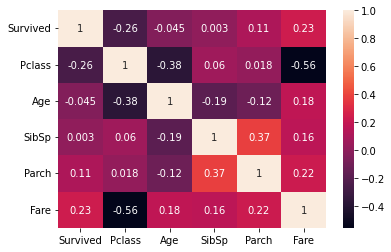

In [33]:
sns.heatmap(data.corr(), annot = True);

In [34]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [35]:
data.iloc[:, (np.where((data.dtypes == np.int64) | (data.dtypes == np.float64)))[0]].columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [36]:
X = data.iloc[:, (np.where((data.dtypes == np.int64) | (data.dtypes == np.float64)))[0]]

X.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [37]:
X.shape

(1306, 6)

In [38]:
X = X.drop('Survived',axis=1)
y = data[['Survived']]

In [39]:
X.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [40]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [41]:
print(X.shape, y.shape)

(1306, 5) (1306, 1)


In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  1306 non-null   int64  
 1   Age     1306 non-null   float64
 2   SibSp   1306 non-null   int64  
 3   Parch   1306 non-null   int64  
 4   Fare    1306 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 61.2 KB


In [43]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  1306 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [45]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(914, 5) (392, 5) (914, 1) (392, 1)


In [46]:
model_sklearn = LinearRegression() 
model_sklearn.fit(X_train,y_train)

LinearRegression()

In [47]:
for idx , col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,model_sklearn.coef_[0][idx]))

The coefficient for Pclass is -0.1356509031032447
The coefficient for Age is -0.006236310773602808
The coefficient for SibSp is -0.022371186540356434
The coefficient for Parch is 0.0495416178463319
The coefficient for Fare is 0.0009488816835891505


In [48]:
intercept = model_sklearn.intercept_[0]
intercept

0.8288684465243364

In [49]:
#Rsquared Value
model_sklearn.score(X_train,y_train)

0.09457339650840002

In [50]:
model_sklearn.score(X_test,y_test)

0.14282897561071328

In [51]:
#RMSE on train
predicted_train = model_sklearn.fit(X_train,y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.4596361742435764

In [52]:
#RMSE on test
predicted_test = model_sklearn.fit(X_test,y_test).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.44757997456253873

In [53]:
# Statsmodels

In [54]:
train_new = pd.concat([X_train, y_train], axis = 1)

train_new.head()

,Pclass,Age,SibSp,Parch,Fare,Survived
842,1,30.0,0,0,31.0000,1
868,3,28.0,0,0,9.5000,0
428,3,28.0,0,0,7.7500,0
479,3,2.0,0,1,12.2875,1
1308,3,28.0,1,1,22.3583,0


In [55]:
test_new = pd.concat([X_test, y_test], axis = 1)

test_new.head()

,Pclass,Age,SibSp,Parch,Fare,Survived
610,3,39.0,1,5,31.275,0
413,2,28.0,0,0,0.000,0
529,2,23.0,2,1,11.500,0
1150,3,21.0,0,0,7.775,0
944,1,28.0,3,2,263.000,1


In [56]:
print(train_new.shape, test_new.shape)

(914, 6) (392, 6)


In [57]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914 entries, 842 to 685
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    914 non-null    int64  
 1   Age       914 non-null    float64
 2   SibSp     914 non-null    int64  
 3   Parch     914 non-null    int64  
 4   Fare      914 non-null    float64
 5   Survived  914 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 50.0 KB


In [58]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 610 to 89
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    392 non-null    int64  
 1   Age       392 non-null    float64
 2   SibSp     392 non-null    int64  
 3   Parch     392 non-null    int64  
 4   Fare      392 non-null    float64
 5   Survived  392 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 21.4 KB


In [59]:
train_new.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived'], dtype='object')

In [60]:
lr_eqn = "Survived ~ Pclass + Age + SibSp + Parch + Fare"

In [61]:
import statsmodels.formula.api as smf
model_stats = smf.ols(formula=lr_eqn,data=train_new).fit()
model_stats.params

Intercept    0.828868
Pclass      -0.135651
Age         -0.006236
SibSp       -0.022371
Parch        0.049542
Fare         0.000949
dtype: float64

In [62]:
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     18.97
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           5.65e-18
Time:                        17:53:20   Log-Likelihood:                -586.44
No. Observations:                 914   AIC:                             1185.
Df Residuals:                     908   BIC:                             1214.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8289      0.081     10.186      0.000       0.669       0.989
Pclass        -0.1357      0.023     -5.790      0.000      -0.182      -0.090
Age           -0.0062      0.001     -4.880      0.000      -0.009      -0.004
SibSp         -0.0224      0.016     -1.419      0.156      -0.053       0.009
Parch          0.0495      0.019      2.557      0.011       0.012       0.088
Fare           0.0009      0.000      2.492      0.013       0.000       0.002
==============================================================================
Omnibus:                     3666.928   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.079
Skew:                           0.502   Prob(JB):                     9.23e-24
Kurtosis:                       1.667   Cond. No.                         349.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
print(model_stats.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     18.97
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           5.65e-18
Time:                        17:53:20   Log-Likelihood:                -586.44
No. Observations:                 914   AIC:                             1185.
Df Residuals:                     908   BIC:                             1214.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8289      0.081     10.186      0.0

In [64]:
# RMSE

np.sqrt(model_stats.mse_resid)

0.46115229548302383

In [65]:
# Prediction on Test data
y_pred = model_stats.predict(test_new)

In [66]:
df_result = pd.concat([test_new['Survived'], y_pred], axis = 1)

df_result.head()

,Survived,0
610,0,0.433713
413,0,0.382950
529,0,0.429843
1150,0,0.298331
944,1,0.800126


In [67]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
pd.Series([variance_inflation_factor(X_train.values, i)
           for i in range(X_train.shape[1])],
          index = X_train.columns)

Pclass    3.561025
Age       4.000013
SibSp     1.488974
Parch     1.450729
Fare      1.742454
dtype: float64